In [1]:
import Pkg
Pkg.add("DifferentialEquations")

  Updating registry at `C:\Users\Rachel\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %40.6 %Fetching: [====================>                    ]  50.0 %======================>                  ]  53.1 %Fetching: [=======================>                 ]  56.3 %>             ]  65.6 %9 % Resolving package versions...
  Updating `C:\Users\Rachel\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\Rachel\.julia\environments\v1.0\Manifest.toml`
 [no changes]


In [ ]:
import Pkg
Pkg.add("Plots")

In [1]:
using DifferentialEquations
using Plots

THIS SECTION IS THE MODEL THAT "MATCHES" THAT DATA

In [16]:
# OUR MODEL - to match data
# k = 0.0044
# d = 15.6
# r = 0.5
function SIRI(du, u, p, t)
    du[1] = - (0.0044 / 32081000.0) * u[1] * u[2]  
    du[2] = (0.0044 / 32081000.0) * u[1] * u[2] - (u[2] / 15.6) + u[3] * 0.5
    du[3] = (u[2] / 15.6) - u[3] * 0.5
end 

SIRI (generic function with 1 method)

In [17]:
#    population; users; sober
#total pop N = 32,081,000
#number of drug users = 50,000
#number of sober = 25,000
u₀ = [32006000.0; 50000.0; 25000.0]
tspan = (0.0, 15.0) #10000 to see changes
prob = ODEProblem(SIRI, u₀, tspan)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 13-element Array{Float64,1}:
  0.0                
  0.13290684998281121
  0.5773842822913721 
  1.2143124461824937 
  1.9693709115429545 
  2.901695653029008  
  3.983323896491557  
  5.250273005860878  
  6.711892699786424  
  8.415710580360193  
 10.41171345717867   
 12.787938537447793  
 15.0                
u: 13-element Array{Array{Float64,1},1}:
 [3.2006e7, 50000.0, 25000.0] 
 [3.2006e7, 51219.6, 23809.9] 
 [3.20059e7, 54711.2, 20421.8]
 [3.20057e7, 58453.8, 16837.7]
 [3.20055e7, 61521.2, 13969.4]
 [3.20053e7, 63976.8, 11771.1]
 [3.20049e7, 65721.1, 10335.1]
 [3.20046e7, 66942.4, 9482.85]
 [3.20041e7, 67807.4, 9050.34]
 [3.20036e7, 68491.9, 8875.63]
 [3.2003e7, 69124.1, 8846.41] 
 [3.20023e7, 69801.4, 8893.66]
 [3.20016e7, 70414.0, 8961.69]

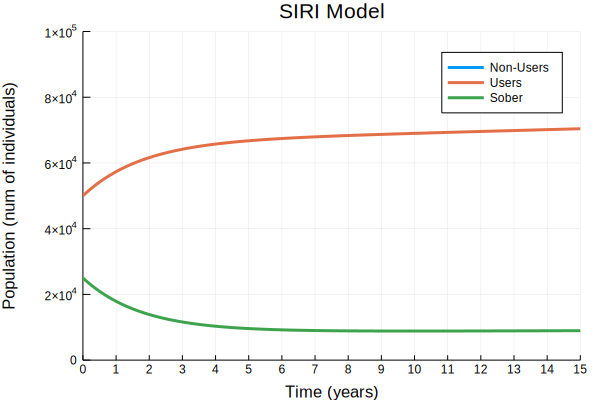

In [18]:
plot(sol, title="SIRI Model", xlabel="Time (years)", ylabel="Population (num of individuals)", 
    label=["Non-Users", "Users", "Sober"], xlims=(0, 15), ylims=(0, 100000), xticks = 0:1:15)

In [19]:
sol_arr = Any[]
for i = 0:15
        push!(sol_arr, sol(i))
end
sol_arr  
#from 2017-2022 there are 1,641 more drug users

16-element Array{Any,1}:
 [3.2006e7, 50000.0, 25000.0] 
 [3.20058e7, 57334.7, 17902.4]
 [3.20055e7, 61621.9, 13877.1]
 [3.20052e7, 64175.0, 11600.5]
 [3.20049e7, 65741.7, 10319.2]
 [3.20046e7, 66747.4, 9604.44]
 [3.20044e7, 67434.4, 9212.08]
 [3.20041e7, 67940.1, 9003.55]
 [3.20038e7, 68343.2, 8899.49]
 [3.20035e7, 68688.6, 8854.92]
 [3.20032e7, 69001.2, 8844.47]
 [3.20029e7, 69296.0, 8853.25]
 [3.20025e7, 69580.8, 8873.18]
 [3.20022e7, 69860.4, 8899.6] 
 [3.20019e7, 70137.7, 8929.54]
 [3.20016e7, 70414.0, 8961.69]

THIS SECTION IS FOR TESTING DIFFERENT VALUES FOR OUR SUGGESTED STUFF


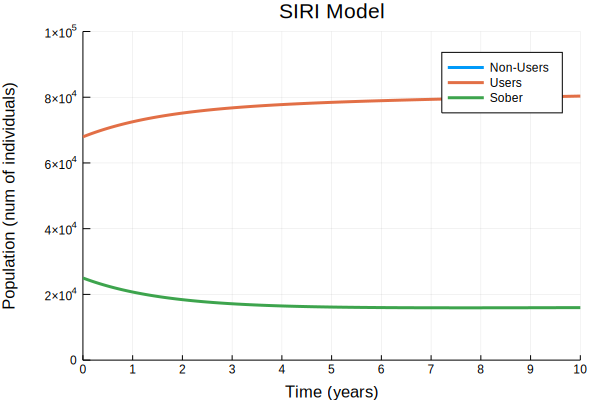

In [20]:

# k = 0.0044 lets keep this the same
# d = 15.6 lets lower this for now - 10
# r = 0.5
function SIRI_TEST(du, u, p, t)
    du[1] = - (0.0044 / 31481000.0) * u[1] * u[2]  
    du[2] = (0.0044 / 31481000.0) * u[1] * u[2] - (u[2] / 10.0) + u[3] * 0.5
    du[3] = (u[2] / 10.0) - u[3] * 0.5
end 
#population; users; sober
#total pop N = 32,081,000
#number of drug users = 50,000
#number of sober = 25,000
u₀ = [31388060.0; 67940.0; 25000.0]
tspan = (0.0, 10.0) #10000 to see changes
prob1 = ODEProblem(SIRI_TEST, u₀, tspan)
sol1 = solve(prob1)
plot(sol1, title="SIRI Model", xlabel="Time (years)", ylabel="Population (num of individuals)", 
    label=["Non-Users", "Users", "Sober"], xlims=(0, 10), ylims=(0, 100000),xticks = 0:1:10)

In [21]:
sol_arr1 = Any[]
for i = 0:10
        push!(sol_arr1, sol1(i))
end
sol_arr1
#from 2017-2022 there are 10,499 more drug users

11-element Array{Any,1}:
 [3.13881e7, 67940.0, 25000.0]
 [3.13878e7, 72527.2, 20721.8]
 [3.13874e7, 75175.7, 18397.9]
 [3.13871e7, 76759.8, 17147.3]
 [3.13868e7, 77760.0, 16486.2]
 [3.13864e7, 78439.9, 16149.0]
 [3.13861e7, 78944.1, 15990.0]
 [3.13857e7, 79352.7, 15928.7]
 [3.13854e7, 79709.1, 15921.2]
 [3.1385e7, 80037.2, 15943.4] 
 [3.13847e7, 80350.3, 15982.1]

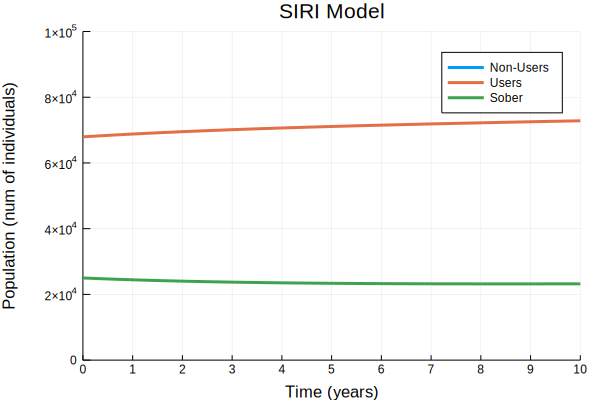

In [22]:
# k = 0.0044 lets keep this the same
# d = 15.6 
# r = 0.5  - lets lower this now, = 0.2
function SIRI_TEST2(du, u, p, t)
    du[1] = - (0.0044 / 31481000.0) * u[1] * u[2]  
    du[2] = (0.0044 / 31481000.0) * u[1] * u[2] - (u[2] / 15.6) + u[3] * 0.2
    du[3] = (u[2] / 15.6) - u[3] * 0.2
end 
#population; users; sober
#total pop N = 32,081,000
#number of drug users = 50,000
#number of sober = 25,000
u₀ = [31388060.0; 67940.0; 25000.0]
tspan = (0.0, 10.0) #10000 to see changes
prob2 = ODEProblem(SIRI_TEST2, u₀, tspan)
sol2 = solve(prob2)
plot(sol2, title="SIRI Model", xlabel="Time (years)", ylabel="Population (num of individuals)", 
    label=["Non-Users", "Users", "Sober"], xlims=(0, 10), ylims=(0, 100000), xticks = 0:1:10)

In [23]:
sol_arr2 = Any[]
for i = 0:10
        push!(sol_arr2, sol2(i))
end
sol_arr2
#from 2017-2022 there are 3,155 more drug users

11-element Array{Any,1}:
 [3.13881e7, 67940.0, 25000.0]
 [3.13878e7, 68797.9, 24442.1]
 [3.13875e7, 69512.8, 24030.6]
 [3.13872e7, 70117.9, 23731.9]
 [3.13868e7, 70638.7, 23519.8]
 [3.13865e7, 71095.0, 23374.4]
 [3.13862e7, 71501.9, 23280.3]
 [3.13859e7, 71871.0, 23225.7]
 [3.13856e7, 72211.1, 23201.6]
 [3.13853e7, 72529.2, 23200.9]
 [3.1385e7, 72830.7, 23218.3] 

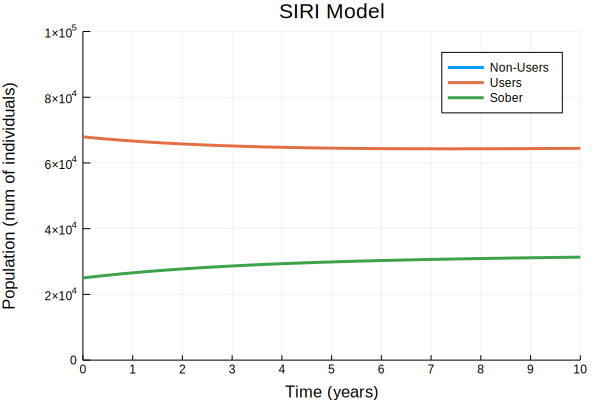

In [24]:

# k = 0.0044 lets keep this the same
# d = 15.6 - lets also lower this - 10
# r = 0.5  - lets lower this now, = 0.2
function SIRI_TEST3(du, u, p, t)
    du[1] = - (0.0044 / 31481000.0) * u[1] * u[2]  
    du[2] = (0.0044 / 31481000.0) * u[1] * u[2] - (u[2] / 10.0) + u[3] * 0.2
    du[3] = (u[2] / 10.0) - u[3] * 0.2
end 
#population; users; sober
#total pop N = 32,081,000
#number of drug users = 50,000
#number of sober = 25,000
u₀ = [31388060.0; 67940.0; 25000.0]
tspan = (0.0, 10.0) #10000 to see changes
prob3 = ODEProblem(SIRI_TEST3, u₀, tspan)
sol3 = solve(prob3)
plot(sol3, title="SIRI Model", xlabel="Time (years)", ylabel="Population (num of individuals)", 
    label=["Non-Users", "Users", "Sober"], xlims=(0, 10), ylims=(0, 100000), xticks = 0:1:10)

In [25]:
sol_arr3 = Any[]
for i = 0:10
        push!(sol_arr3, sol3(i))
end
sol_arr3
#from 2017-2022 there are 3,438 less drug users

11-element Array{Any,1}:
 [3.13881e7, 67940.0, 25000.0]
 [3.13878e7, 66671.8, 26563.3]
 [3.13875e7, 65778.8, 27746.8]
 [3.13872e7, 65164.3, 28648.4]
 [3.13869e7, 64756.5, 29341.0]
 [3.13866e7, 64502.3, 29878.8]
 [3.13863e7, 64362.2, 30301.4]
 [3.13861e7, 64306.8, 30639.1]
 [3.13858e7, 64314.4, 30913.6]
 [3.13855e7, 64369.0, 31141.1]
 [3.13852e7, 64458.5, 31334.2]